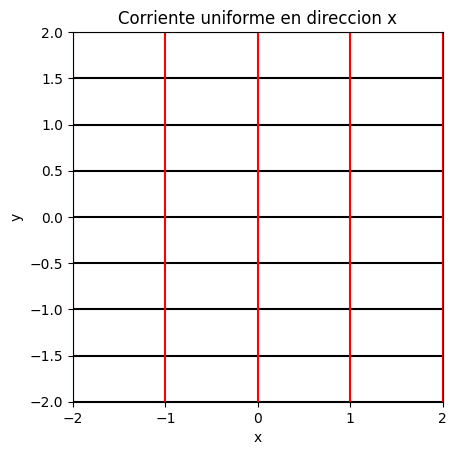

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#-------Código prof. Aldo --------------
# Parameters
U = 1 # Valor de U infinito

# Grid: la rejilla para calcular el campo de flujo
x = np.arange(-2, 2.02, 0.02)
y = np.arange(-2, 2.02, 0.02)
# Initialize the meshgrid
xx, yy = np.meshgrid(x, y)
# Funcion potencial de velocidad:
phi = U * xx
# Funcion de corriente:
psi = U * yy
# Graficas: corriente uniforme en direccion x
plt.contour(xx, yy, psi, np.arange(-2, 2.5, 0.5), colors='k',
linestyles='solid')
plt.contour(xx, yy, phi, np.arange(-10, 6, 1), colors='r',
linestyles='solid')
plt.axis('image')
plt.title('Corriente uniforme en direccion x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#-------------------------------------------------------


2. Corriente uniforme en dirección $\theta$

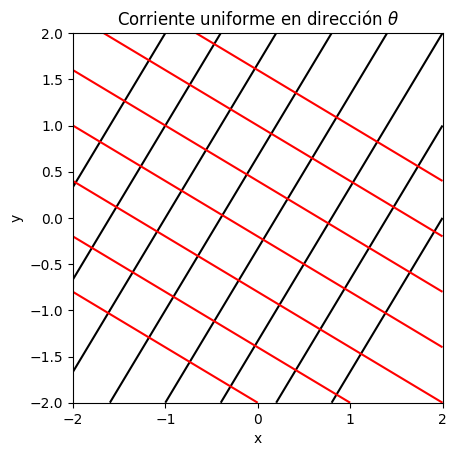

In [ ]:
U_inf = 3
v_inf = 5

phi = U_inf*xx + v_inf*yy
psi = -v_inf*xx + U_inf*yy
# Graficas: corriente uniforme en direccion x
plt.contour(xx, yy, psi, np.arange(-10, 12, 3), colors='k',
linestyles='solid')
plt.contour(xx, yy, phi, np.arange(-10, 10, 3), colors='r',
linestyles='solid')
plt.axis('image')
plt.title(r'Corriente uniforme en dirección $\theta$')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


3. Fuente o sumidero

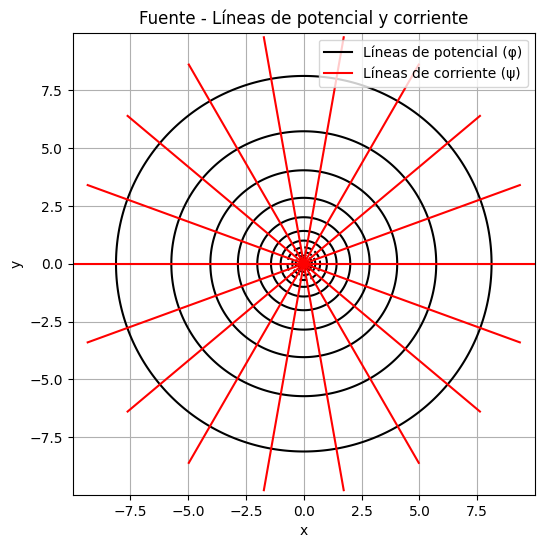

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Intensidad de la fuente
Lambda = 0.054

# Malla en coordenadas polares
r = np.arange(0.01, 10, 0.01)   # empieza en 0.01 para evitar log(0)
theta = np.arange(0, 2*np.pi, 0.01)
R, Theta = np.meshgrid(r, theta)
X, Y = R * np.cos(Theta), R * np.sin(Theta)

# Funciones de potencial y de corriente
phi = (Lambda / (2*np.pi)) * np.log(R)
psi = (Lambda / (2*np.pi)) * Theta

# Gráficas
plt.figure(figsize=(6,6))
plt.contour(X, Y, phi, levels=20, colors='k')
plt.contour(X, Y, psi, levels=20, colors='r')
# Handles para la leyenda
plt.plot([], [], 'k', label='Líneas de potencial (φ)')
plt.plot([], [], 'r', label='Líneas de corriente (ψ)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fuente - Líneas de potencial y corriente')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()


4. El dipolo

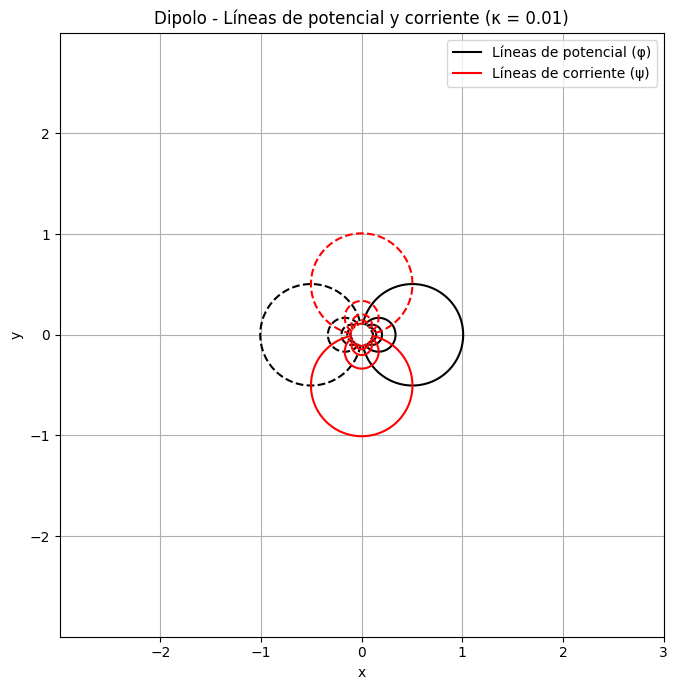

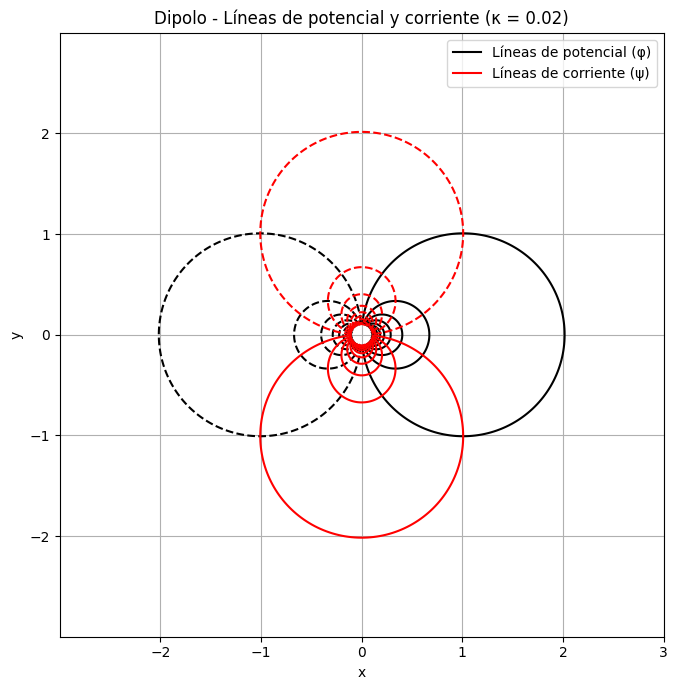

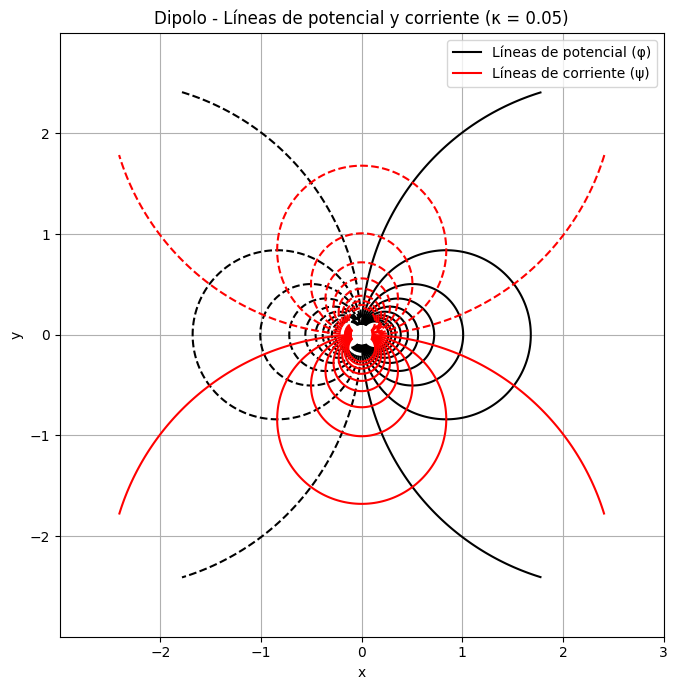

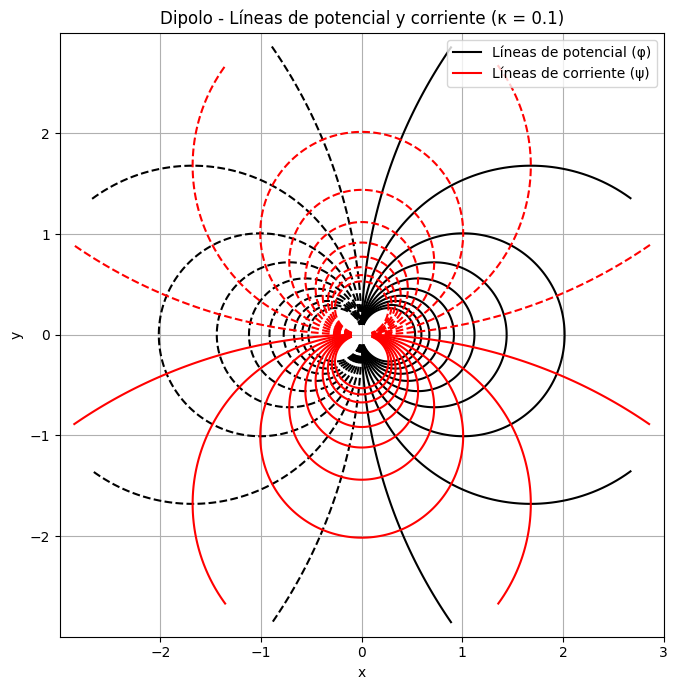

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Vector de intensidades del dipolo ---
kappa_values = [0.01, 0.02, 0.05, 0.1]

# --- Mallas polar y cartesiana (solo se generan una vez) ---
r = np.linspace(0.1, 3, 400)
theta = np.linspace(0, 2*np.pi, 400)
R, Theta = np.meshgrid(r, theta)
X, Y = R*np.cos(Theta), R*np.sin(Theta)

# --- Bucle sobre cada valor de kappa ---
for kappa in kappa_values:
    # Funciones de potencial y corriente del dipolo
    phi = (kappa / (2*np.pi)) * (np.cos(Theta) / R)
    psi = -(kappa / (2*np.pi)) * (np.sin(Theta) / R)

    # --- Gráfica ---
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, phi, levels=np.linspace(-0.03, 0.03, 20), colors='k')
    plt.contour(X, Y, psi, levels=np.linspace(-0.03, 0.03, 20), colors='r')

    # Etiquetas y formato
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Dipolo - Líneas de potencial y corriente (κ = {kappa})')
    plt.plot([], [], 'k', label='Líneas de potencial (φ)')
    plt.plot([], [], 'r', label='Líneas de corriente (ψ)')
    plt.legend()
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


5. Vórtice

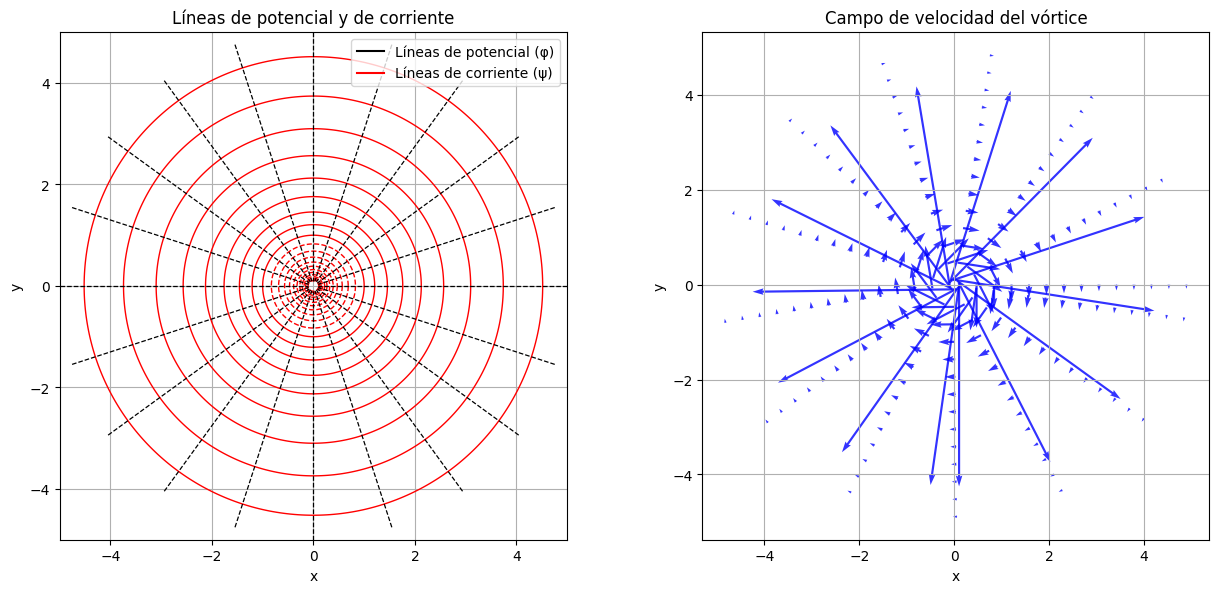

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Intensidad del vórtice
Gamma = 5.0

# Malla en coordenadas polares
r = np.linspace(0.1, 5, 400)
theta = np.linspace(0, 2*np.pi, 400)
R, Theta = np.meshgrid(r, theta)

# Transformación a coordenadas cartesianas
X, Y = R * np.cos(Theta), R * np.sin(Theta)

# Potencial y función de corriente
phi = -(Gamma / (2*np.pi)) * Theta
psi = (Gamma / (2*np.pi)) * np.log(R)

# --- Componentes de velocidad ---
u_r = np.zeros_like(R)
u_theta = -Gamma / (2*np.pi*R)

# Transformación a coordenadas cartesianas
u = u_r * np.cos(Theta) - u_theta * np.sin(Theta)
v = u_r * np.sin(Theta) + u_theta * np.cos(Theta)

# --- Subfiguras ---
fig, axs = plt.subplots(1, 2, figsize=(13,6))

# --- Subfigura 1: líneas de potencial y corriente ---
axs[0].contour(X, Y, psi, levels=20, colors='red', linewidths=1)
axs[0].contour(X, Y, phi, levels=20, colors='k', linewidths=0.9)
axs[0].plot([], [], 'k', label='Líneas de potencial (φ)')
axs[0].plot([], [], 'r', label='Líneas de corriente (ψ)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Líneas de potencial y de corriente')
axs[0].legend()
axs[0].grid(True)
axs[0].set_aspect('equal')

# --- Subfigura 2: campo de velocidad ---
skip = 30  # espaciamiento de vectores
axs[1].quiver(X[::skip, ::skip], Y[::skip, ::skip],
              u[::skip, ::skip], v[::skip, ::skip],
              color='blue', scale=20, alpha=0.8)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Campo de velocidad del vórtice')
axs[1].grid(True)
axs[1].set_aspect('equal')

plt.tight_layout()
plt.show()


6. Superposición de flujos

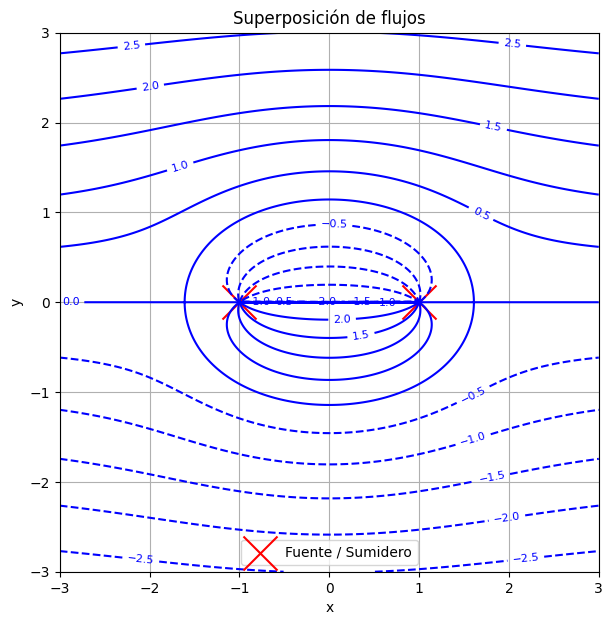

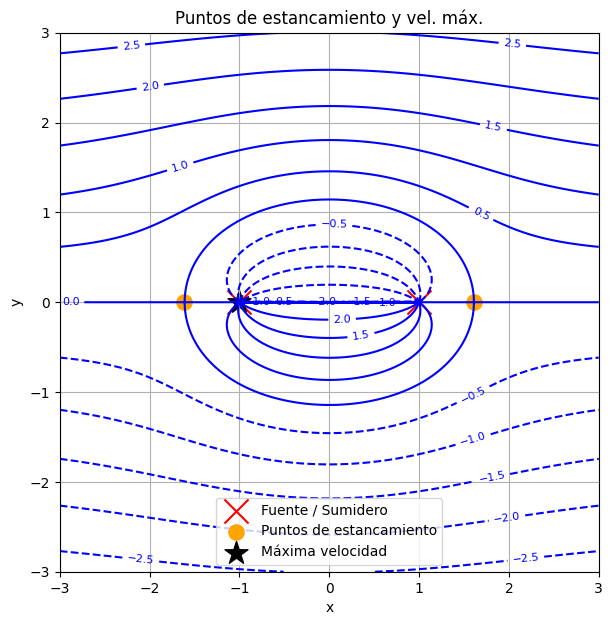

Puntos de estancamiento (x, y, |V|):
(-1.617, 0.008),  |V|=0.0202
(1.617, 0.008),  |V|=0.0202

Máxima velocidad ≈ 105.846 en (x, y) = (-1.000, 0.008)


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
U_inf = 1.0
Lambda = 5.0
a = 1.0

# Malla cartesiana
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# Función de corriente
psi = (U_inf * Y +
       (Lambda / (2*np.pi)) * (np.arctan2(Y, X + a) - np.arctan2(Y, X - a)))

# Gráfica de líneas de corriente
plt.figure(figsize=(7,7))
contours = plt.contour(X, Y, psi, levels=10, colors='b')
plt.clabel(contours, inline=True, fontsize=8)

# Marcar las posiciones de la fuente y el sumidero
plt.scatter([-a, a], [0, 0], color='r', marker='x', s=600, label='Fuente / Sumidero')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Superposición de flujos')
plt.legend()
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

# Velocidad
u = (U_inf
     + (Lambda/(2*np.pi)) * ((X + a)/((X + a)**2 + Y**2)
     - (X - a)/((X - a)**2 + Y**2)))
v = -(Lambda/(2*np.pi)) * (Y/((X + a)**2 + Y**2)
     - Y/((X - a)**2 + Y**2))

#  Magnitud de la velocidad
V = np.sqrt(u**2 + v**2)

# 1) Puntos de estancamiento como mínimos locales
from scipy.ndimage import minimum_filter, label, find_objects

# Aplicar un filtro mínimo local
V_min_local = (V == minimum_filter(V, size=7))
labeled, num_features = label(V_min_local)

stagnation_points = []
for sl in find_objects(labeled):
    sub_V = V[sl]
    min_pos = np.unravel_index(np.argmin(sub_V), sub_V.shape)
    # Convertir a coordenadas globales
    i_global = min_pos[0] + sl[0].start
    j_global = min_pos[1] + sl[1].start
    stagnation_points.append((X[i_global, j_global], Y[i_global, j_global], V[i_global, j_global]))

# Filtrar los puntos de estancamiento con V muy baja, escogimos finalmente 0.03
stagnation_points = [p for p in stagnation_points if p[2] < 0.03]

# Encontrar vel. Max
imax, jmax = np.unravel_index(np.argmax(V), V.shape)
x_vmax, y_vmax = X[imax, jmax], Y[imax, jmax]
Vmax = V[imax, jmax]


# Plots con todo
plt.figure(figsize=(7,7))
contours = plt.contour(X, Y, psi, levels=10, colors='b')
plt.clabel(contours, inline=True, fontsize=8)
plt.scatter([-a, a], [0, 0], color='r', marker='x', s=300, label='Fuente / Sumidero')

# Puntos de estancamiento
if stagnation_points:
    xs = [p[0] for p in stagnation_points]
    ys = [p[1] for p in stagnation_points]
    plt.scatter(xs, ys, color='orange', s=120, marker='o', label='Puntos de estancamiento')

# Punto de máxima velocidad
plt.scatter(x_vmax, y_vmax, color='k', s=300, marker='*', label='Máxima velocidad')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos de estancamiento y vel. máx.')
plt.legend()
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

#Imprimir resultads
print("Puntos de estancamiento (x, y, |V|):")
for p in stagnation_points:
    print(f"({p[0]:.3f}, {p[1]:.3f}),  |V|={p[2]:.4f}")


print(f"\nMáxima velocidad ≈ {Vmax:.3f} en (x, y) = ({x_vmax:.3f}, {y_vmax:.3f})")

7. Flujo alrededor de un cilindro (que no rota)

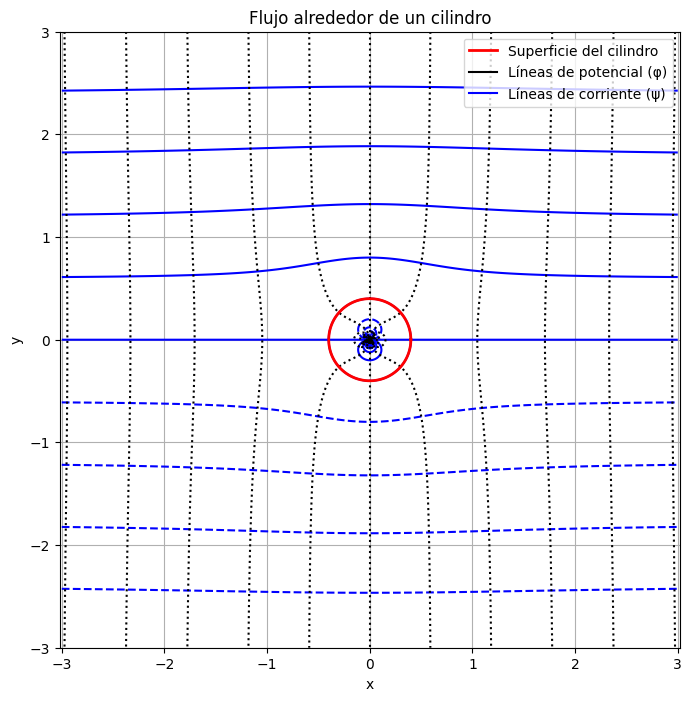

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del flujo
U_inf = 1.0    # velocidad del flujo uniforme
R = 0.4       # radio del cilindro

# Malla cartesiana
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
r2 = X**2 + Y**2

# Función de corriente y potencial
psi = U_inf * Y * (1 - (R**2) / r2)
phi = U_inf * X * (1 + (R**2) / r2)

# Gráficas
plt.figure(figsize=(8,8))
cont1 = plt.contour(X, Y, psi, levels=40, colors='b')
cont2 = plt.contour(X, Y, phi, levels=40, colors='k', linestyles='dotted')

# Frontera del cilindro
theta = np.linspace(0, 2*np.pi, 200)
xc, yc = R*np.cos(theta), R*np.sin(theta)
plt.plot(xc, yc, 'r', linewidth=2, label='Superficie del cilindro')
# Handles para la leyenda
plt.plot([], [], 'k', label='Líneas de potencial (φ)')
plt.plot([], [], 'b', label='Líneas de corriente (ψ)')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Flujo alrededor de un cilindro')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


<>:35: SyntaxWarning: invalid escape sequence '\G'
<>:35: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipython-input-3069831365.py:35: SyntaxWarning: invalid escape sequence '\G'
  ax.set_title(f"$\Gamma = {Gamma:.2f}$")


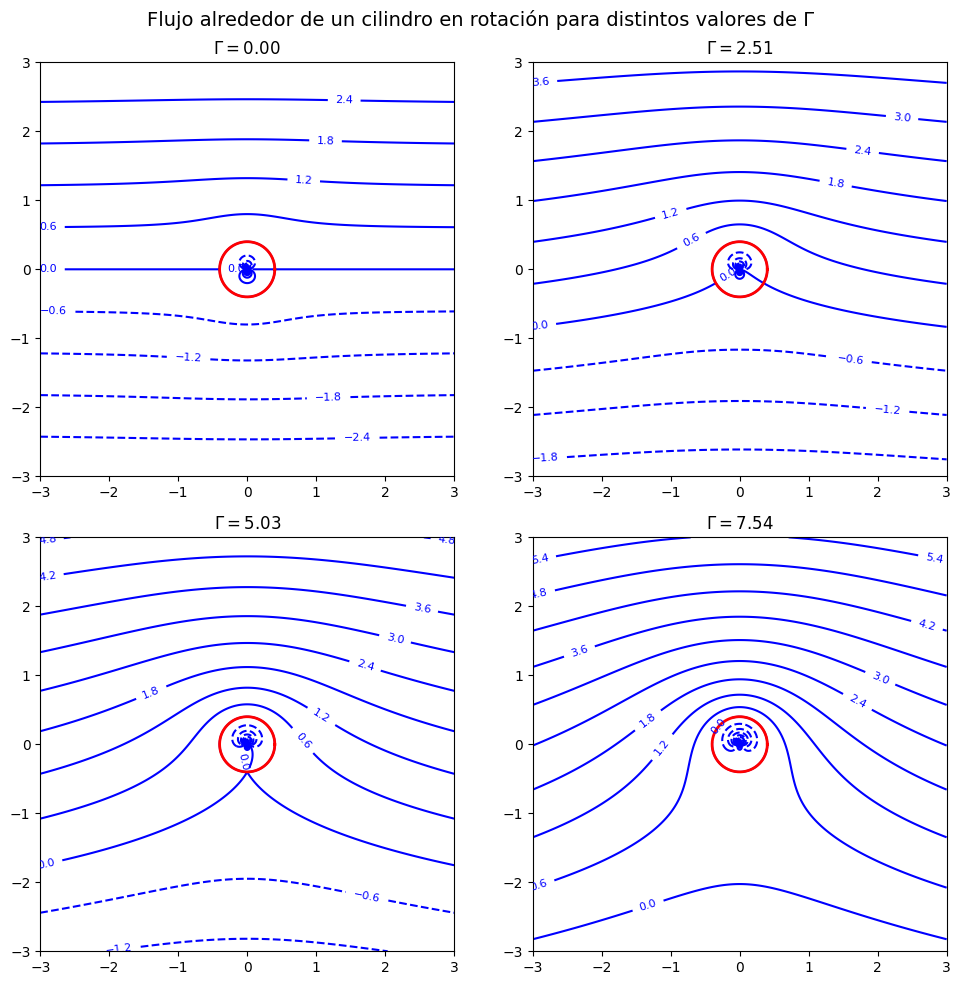

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del flujo
U_inf = 1.0   # velocidad del flujo libre
R = 0.4      # radio del cilindro
Gamma_values = [0, 4*np.pi*U_inf*R*0.5, 4*np.pi*U_inf*R, 4*np.pi*U_inf*R*1.5]

# Malla de puntos
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
r2 = X**2 + Y**2

# Gráficas para cada caso de Γ
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, Gamma in enumerate(Gamma_values):
    psi = (U_inf * Y * (1 - R**2 / r2)
           + (Gamma / (2*np.pi)) * np.log(np.sqrt(r2)/R))

    ax = axes[i]
    cont = ax.contour(X, Y, psi, levels=40, colors='b')
    ax.clabel(cont, inline=True, fontsize=8)

    # Dibuja el cilindro
    theta = np.linspace(0, 2*np.pi, 200)
    xc, yc = R*np.cos(theta), R*np.sin(theta)
    ax.plot(xc, yc, 'r', linewidth=2)

    ax.set_aspect('equal')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(f"$\Gamma = {Gamma:.2f}$")

plt.suptitle("Flujo alrededor de un cilindro en rotación para distintos valores de Γ", fontsize=14)
plt.tight_layout()
plt.show()


<>:37: SyntaxWarning: invalid escape sequence '\G'
<>:37: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipython-input-1754939046.py:37: SyntaxWarning: invalid escape sequence '\G'
  ax.set_title(f"$\Gamma = {Gamma:.2f}$")


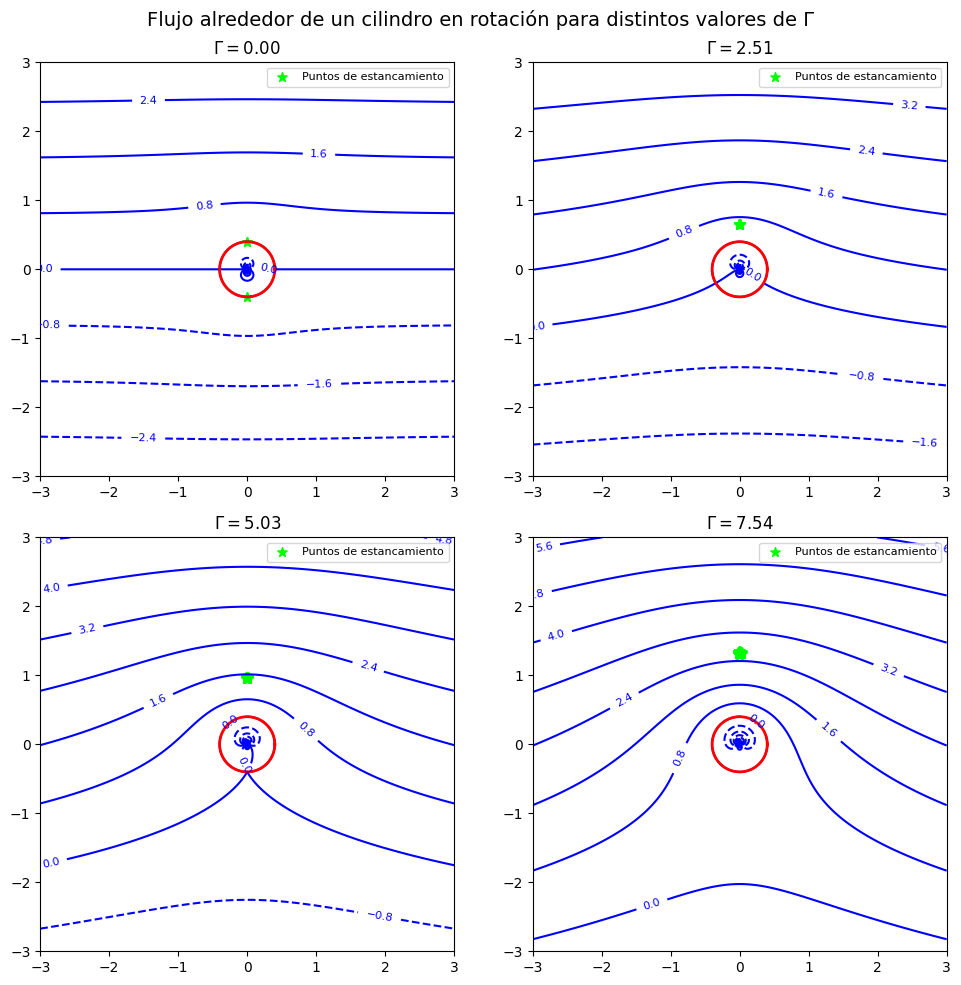

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import minimum_position

U_inf = 1.0
R = 0.4
Gamma_values = [0, 4*np.pi*U_inf*R*0.5, 4*np.pi*U_inf*R, 4*np.pi*U_inf*R*1.5]

x = np.linspace(-3, 3, 800)
y = np.linspace(-3, 3, 800)
X, Y = np.meshgrid(x, y)
r2 = X**2 + Y**2

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, Gamma in enumerate(Gamma_values):
    psi = (U_inf * Y * (1 - R**2 / r2)
           + (Gamma / (2*np.pi)) * np.log(np.sqrt(r2)/R))
    u = U_inf * (1 + (R**2 * (X**2 - Y**2)) / r2**2) - Gamma * Y / (2*np.pi*r2)
    v = U_inf * (2 * R**2 * X * Y / r2**2) + Gamma * X / (2*np.pi*r2)
    speed = np.sqrt(u**2 + v**2)
    mask = speed < 0.025
    points = np.argwhere(mask)

    ax = axes[i]
    cont = ax.contour(X, Y, psi, levels=60, colors='b')
    ax.clabel(cont, inline=True, fontsize=8)
    theta = np.linspace(0, 2*np.pi, 200)
    xc, yc = R*np.cos(theta), R*np.sin(theta)
    ax.plot(xc, yc, 'r', linewidth=2)
    if len(points) > 0:
        ax.scatter(X[mask], Y[mask], marker="*", color='lime', s=50, label='Puntos de estancamiento')
    ax.set_aspect('equal')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(f"$\Gamma = {Gamma:.2f}$")
    ax.legend(loc='upper right', fontsize=8)

plt.suptitle("Flujo alrededor de un cilindro en rotación para distintos valores de Γ", fontsize=14)
plt.tight_layout()
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\G'
<>:13: SyntaxWarning: invalid escape sequence '\G'
/tmp/ipython-input-1718196356.py:13: SyntaxWarning: invalid escape sequence '\G'
  plt.plot(theta, Cp, label=f"$\Gamma = {Gamma:.2f}$")


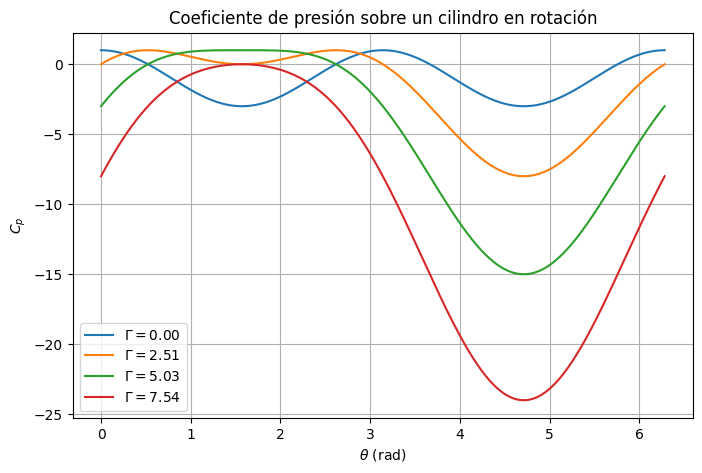

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

U_inf = 1.0
R = 0.4
Gamma_values = [0, 4*np.pi*U_inf*R*0.5, 4*np.pi*U_inf*R, 4*np.pi*U_inf*R*1.5]

theta = np.linspace(0, 2*np.pi, 400)

plt.figure(figsize=(8,5))
for Gamma in Gamma_values:
    Cp = 1 - (2*np.sin(theta) - (Gamma/(2*np.pi*R*U_inf)))**2
    plt.plot(theta, Cp, label=f"$\Gamma = {Gamma:.2f}$")

plt.xlabel(r"$\theta$ (rad)")
plt.ylabel(r"$C_p$")
plt.title("Coeficiente de presión sobre un cilindro en rotación")
plt.legend()
plt.grid(True)
plt.show()
